In [2]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import warnings

# !pip install statsmodels
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error as mae
# !pip install arch
from arch.unitroot import ADF, VarianceRatio
warnings.filterwarnings("ignore")

#### QUESTION 1

Intraday on-shore wind power generation measured every hour for one year is available from the
csv file WindGeneration.csv. Load the data into your computer and produce a graphic showing
the time series of the wind generation over time. Is there evidence of annual seasonality?

In [3]:
# READING IN THE csv - Intraday on-shore wind power generation measured every hour for one year
windPower = pd.read_csv("WindGeneration.csv", parse_dates = True)

# SEE IF THERE ARE NANS and EMPTY FIELDS
windPower.info()

# CHECK THE FIRST 5 ROWS OF THE DATAFRAME
windPower.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Time             8760 non-null   int64  
 2   Wind Generation  8759 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 205.4+ KB


,Date,Time,Wind Generation
0,01/01/2014,1,1190.1
1,01/01/2014,2,1186.6
2,01/01/2014,3,1174.3
3,01/01/2014,4,1146.7
4,01/01/2014,5,1156.8


In [4]:
# CHANGING DATE COLUMN TO DATETIME FORMAT
dateFormat = "%d/%m/%Y"
windPower["Date"] = pd.to_datetime(windPower["Date"], format = dateFormat)

# CHANGING TIME COLUMN TO TIMEDELTA FORMAT
timeDelta = pd.to_timedelta(windPower["Time"], unit="hours")

# GENERATE TIMESTAMPS FROM DATETIME BY ADDING THE TIME TO DATE
windPower["Date"] = windPower["Date"] + timeDelta

# FILLING NAN VALUES IN THE DATAFRAME - USING LINEAR INTERPOLATION
windPower = windPower.interpolate(method = 'pad')
windPower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Time             8760 non-null   int64         
 2   Wind Generation  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 205.4 KB


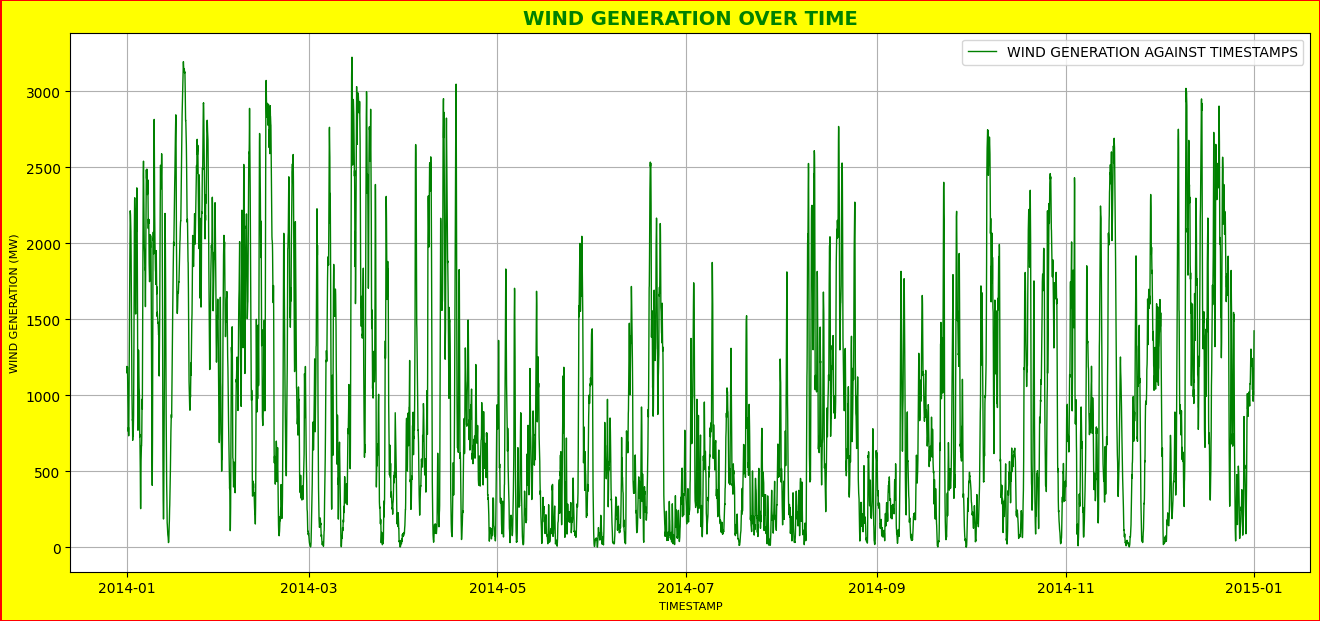

In [5]:
# PRODUCING A GRAPHIC SHOWING THE TIME SERIES OF THE WIND GENERATION OVER TIME
windDate = windPower["Date"]
windGen = windPower["Wind Generation"]

# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize = (16, 7), edgecolor = "red", facecolor = "yellow", linewidth = 1)
plt.xlabel("TIMESTAMP", color = "black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color = "black", fontsize = 8)
plt.title("WIND GENERATION OVER TIME", color = "green", fontsize = 14, fontweight = "bold")

# PLOTTING THE GRAPH OF WIND GENERATION AGAINST TIMESTAMPS
plt.plot(windDate, windGen, label="WIND GENERATION AGAINST TIMESTAMPS", color = "green", linewidth = 1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [6]:
# SETTING THE DATE AS THE INDEX
windPower = windPower.set_index("Date")

# DROP THE Time COLUMN AS IT IS NO LONGER NEEDED
windPower = windPower.drop("Time", axis=1)

# MAKING A DAILY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPowerDaily = windPower.resample("D").mean()
windPowerDaily.tail(2)


,Wind Generation
Date,
2014-12-31,1155.733333
2015-01-01,1424.800000


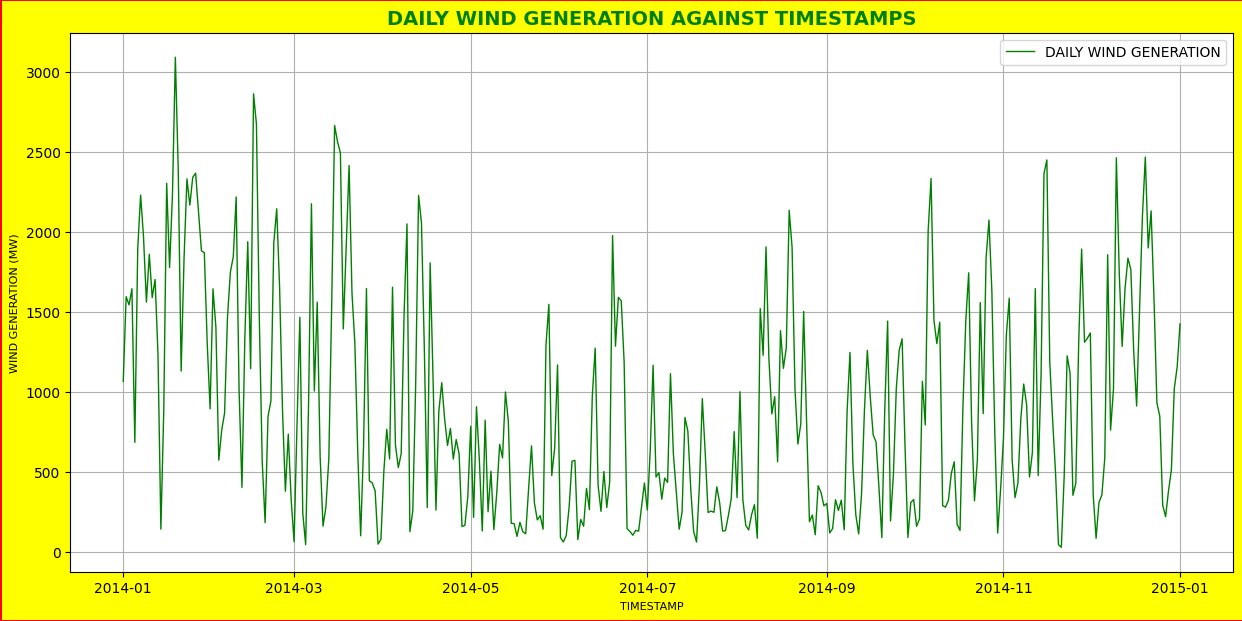

In [7]:
# PRODUCING A GRAPHIC SHOWING DAILY TIME SERIES OF THE WIND GENERATION
windDaily = windPowerDaily.index
windGenD = windPowerDaily["Wind Generation"]

# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize=8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize=8)
plt.title("DAILY WIND GENERATION AGAINST TIMESTAMPS", color="green", fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF DAILY WIND GENERATION AGAINST TIMESTAMPS
plt.plot(windDaily, windGenD, label="DAILY WIND GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [8]:
# MAKING A WEEKLY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPowerWeekly = windPower.resample("W").mean()
windPowerWeekly.tail()

,Wind Generation
Date,
2014-12-07,701.604762
2014-12-14,1534.852381
2014-12-21,1699.818452
2014-12-28,911.125595
2015-01-04,901.858904


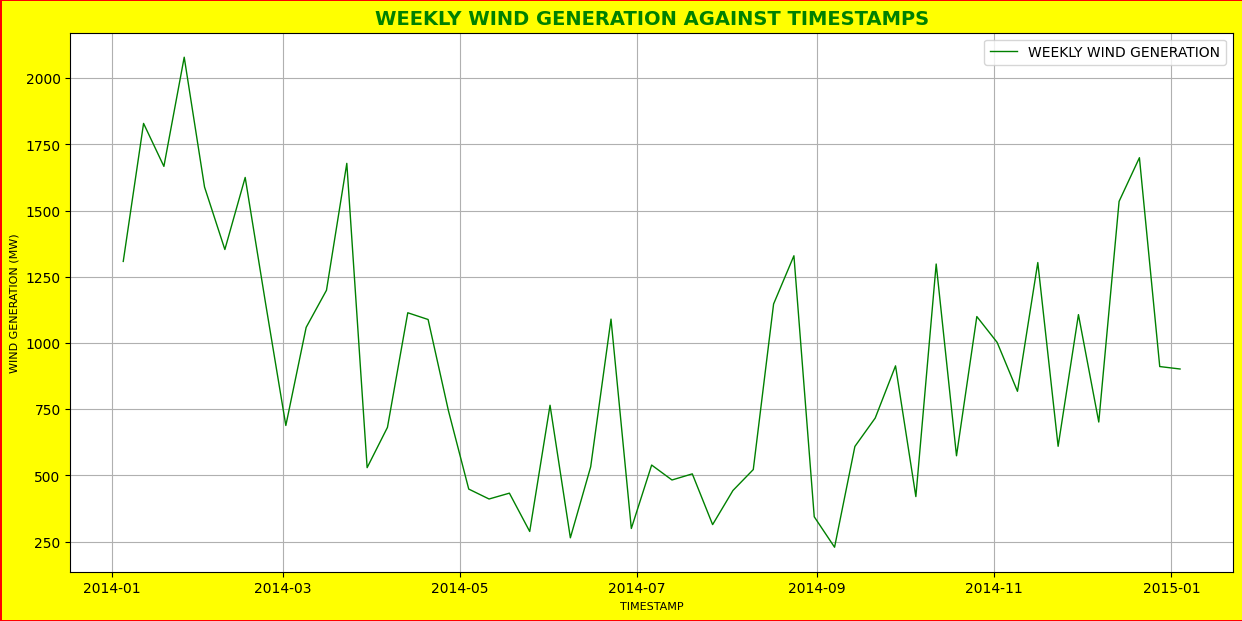

In [9]:
# PRODUCING A GRAPHIC SHOWING WEEKLY TIME SERIES OF THE WIND GENERATION
windWeekly = windPowerWeekly.index
windGenW = windPowerWeekly["Wind Generation"]

# PLOTTING THE GRAPH OF WEEKLY WIND GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize=8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize = 8)
plt.title("WEEKLY WIND GENERATION AGAINST TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF WEEKLY WIND GENERATION AGAINST TIMESTAMPS
plt.plot(windWeekly, windGenW, label="WEEKLY WIND GENERATION",
         color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [10]:
# MAKING A MONTHLY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPowerMonthly = windPower.resample("M").mean()
windPowerMonthly.tail()

,Wind Generation
Date,
2014-09-30,589.202222
2014-10-31,913.152151
2014-11-30,964.340972
2014-12-31,1181.148253
2015-01-31,1424.800000


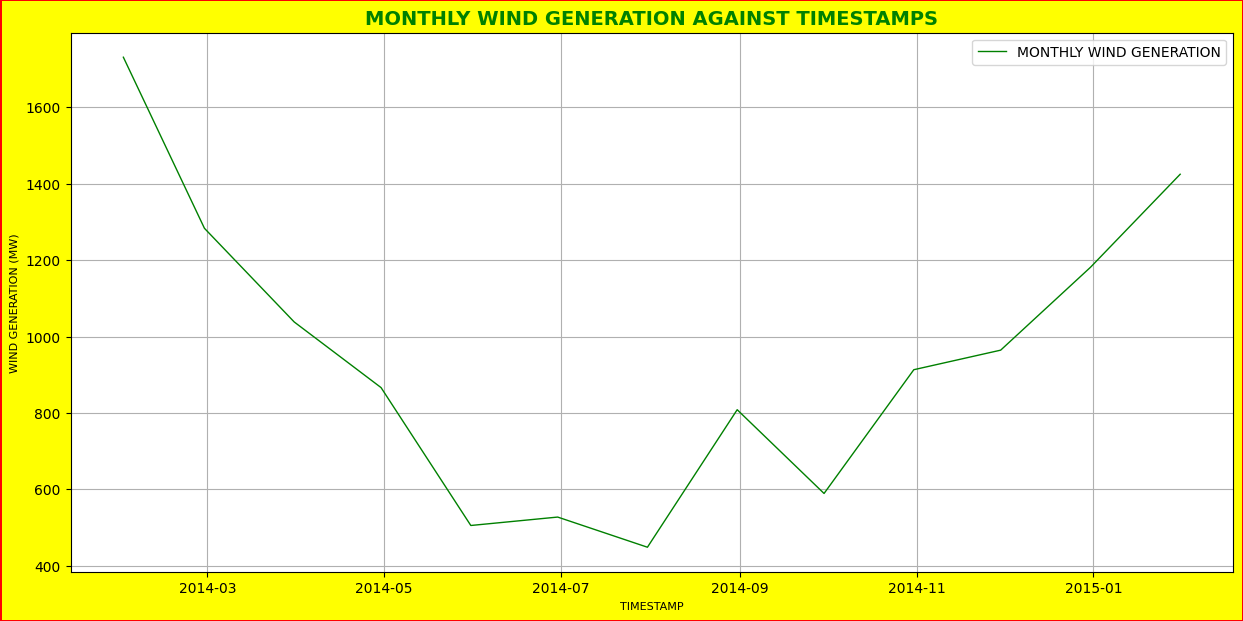

In [11]:
# PRODUCING A GRAPHIC SHOWING MONTHLY TIME SERIES OF THE WIND GENERATION
windMonthly = windPowerMonthly.index
windGenM = windPowerMonthly["Wind Generation"]

# PLOTTING THE GRAPH OF MONTHLY WIND GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize=8)
plt.title("MONTHLY WIND GENERATION AGAINST TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF MONTHLY WIND GENERATION AGAINST TIMESTAMPS
plt.plot(windMonthly, windGenM, label="MONTHLY WIND GENERATION",
         color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right")
plt.grid()
plt.show()


In [12]:
# MAKING A QUARTELY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPowerQuartely = windPower.resample("Q").mean()
windPowerQuartely

,Wind Generation
Date,
2014-03-31,1352.930107
2014-06-30,631.641255
2014-09-30,615.661051
2014-12-31,1020.147192
2015-03-31,1424.800000


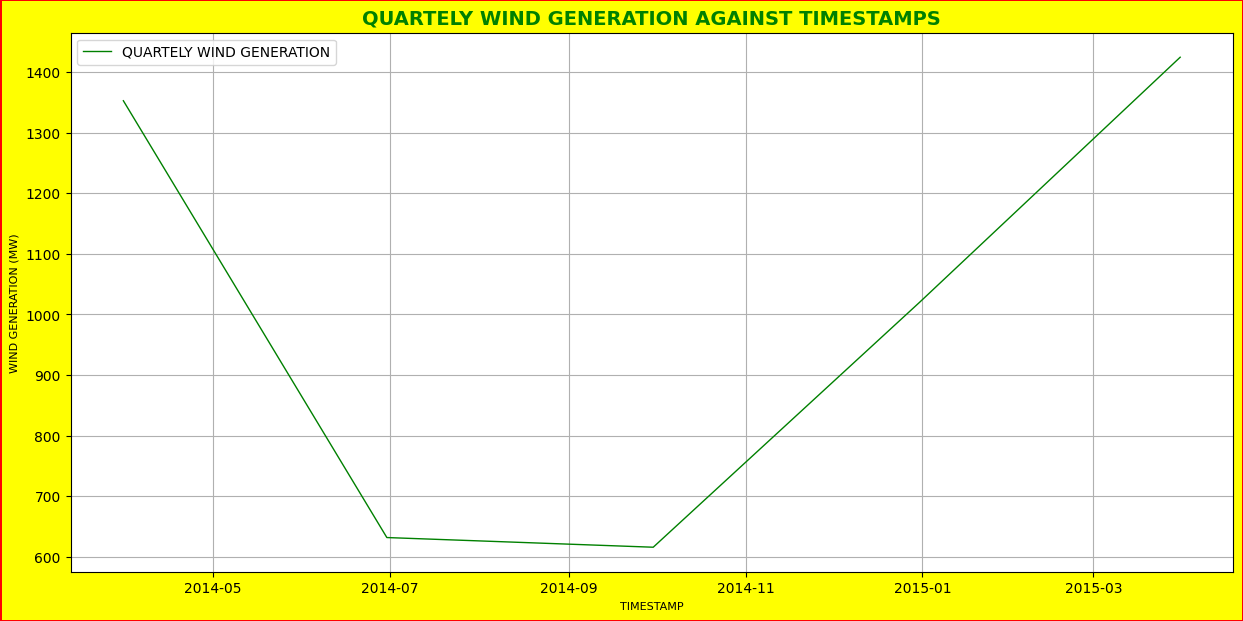

In [13]:
# PRODUCING A GRAPHIC SHOWING QUARTELY TIME SERIES OF THE WIND GENERATION
windQuartely = windPowerQuartely.index
windGenQ = windPowerQuartely["Wind Generation"]

# PLOTTING QUARTELY TIME SERIES OF THE WIND GENERATION
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize=8)
plt.title("QUARTELY WIND GENERATION AGAINST TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF QUARTELY WIND GENERATION AGAINST TIMESTAMPS
plt.plot(windQuartely, windGenQ, label="QUARTELY WIND GENERATION",
         color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### QUESTION 2

Plot the change in wind generation over time as a percentage of the maximum generation. 
Is there evidence of annual seasonality?

In [14]:
# FINDING MAXIMUM GENERATION OF WIND POWER
maxGeneration = windPower.max()
maxGeneration

Wind Generation    3225.4
dtype: float64

In [15]:
# GENERATING THE CHANGE IN WIND GENERATION OVER TIME - FORMULA: r(t) = 100 * ([p(t)/p(t-1)] - 1)/max(p)
# FINDING THE CHANGES IN WIND GENERATION OVER TIME
i = 1
windPowerChange = []  # LIST TO STORE THE CHANGES IN WIND GENERATION OVER TIME
genWind = windPower["Wind Generation"]

# LOOPING THROUGH THE WIND GENERATION DATA TO FIND THE CHANGES IN WIND GENERATION OVER TIME
while (i < len(genWind)):
    # CALCULATING THE CHANGE IN WIND GENERATION OVER TIME AND APPENDING IT TO THE LIST
    windPowerChange.append(100 *
                           ((((genWind)[i]-(genWind)[i-1])-1) / maxGeneration))
    i += 1


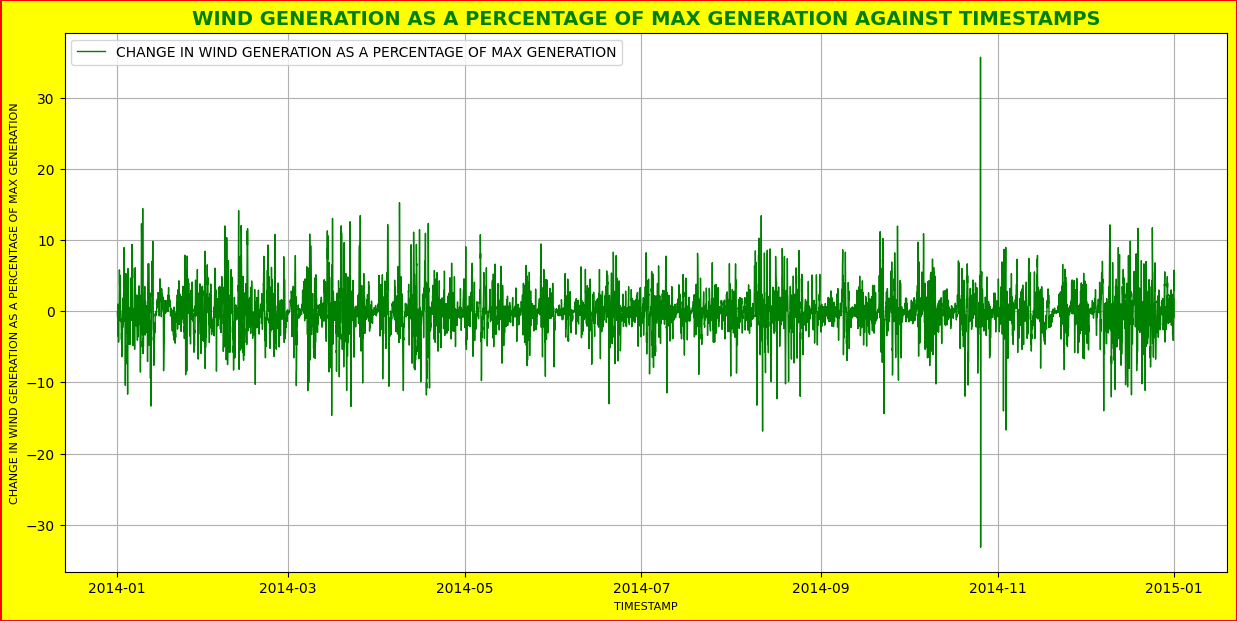

In [16]:
# PRODUCING A GRAPHIC SHOWING CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION", color="black", fontsize = 8)
plt.title("WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.plot(windPower.index[1:], windPowerChange, label="CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [17]:
# DROP THE FIRST ROW FROM THE DATAFRAME
windPerc = windPower.drop(windPower.index[0])

# ADD THE WIND GENERATION CHANGE COLUMN TO THE DATAFRAME
windPerc['Change in Wind Generation'] = windPowerChange

# MAKING A DAILY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPercDaily = windPerc.astype(float).resample("D").mean()
windPercDaily.head(4)

,Wind Generation,Change in Wind Generation
Date,,
2014-01-01,1059.186364,0.568781
2014-01-02,1594.850000,-1.207731
2014-01-03,1543.333333,1.186158
2014-01-04,1644.262500,-0.642944


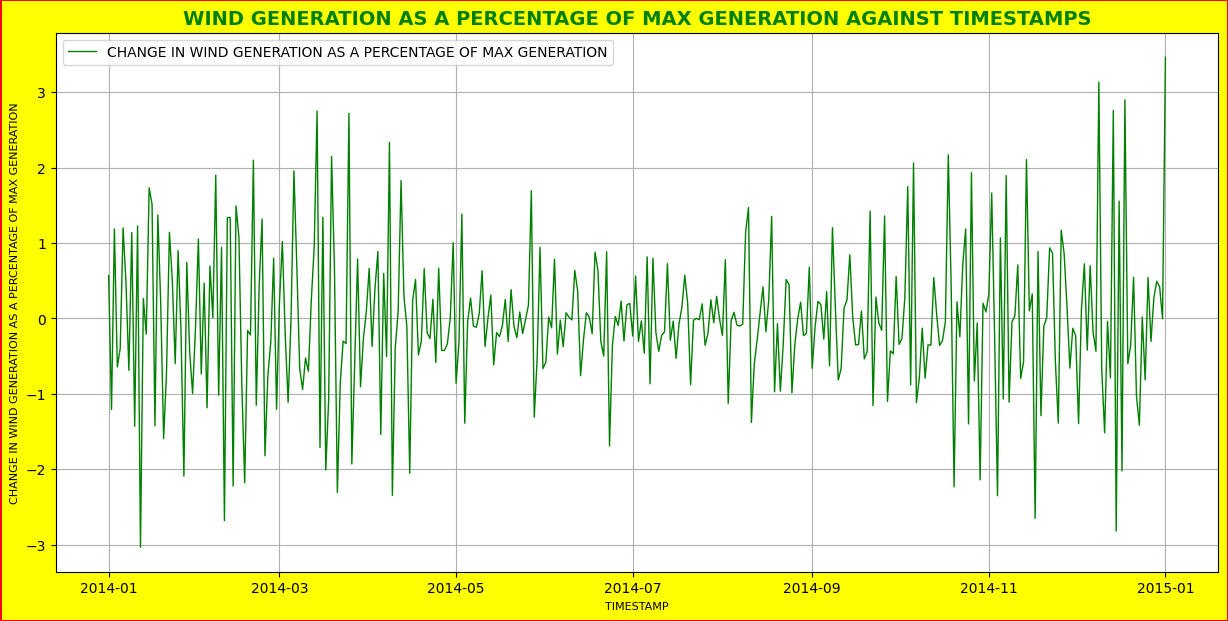

In [18]:
# PRODUCING A GRAPHIC SHOWING CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION", color="black", fontsize = 8)
plt.title("WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.plot(windPercDaily.index, windPercDaily['Change in Wind Generation'], label="CHANGE IN WIND GENERATION AS A PERCENTAGE OF MAX GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

            Wind Generation  Change in Wind Generation
Date                                                  
2014-12-14      1534.852381                   0.347484
2014-12-21      1699.818452                  -0.113921
2014-12-28       911.125595                  -0.390262
2015-01-04       901.858904                   0.345205


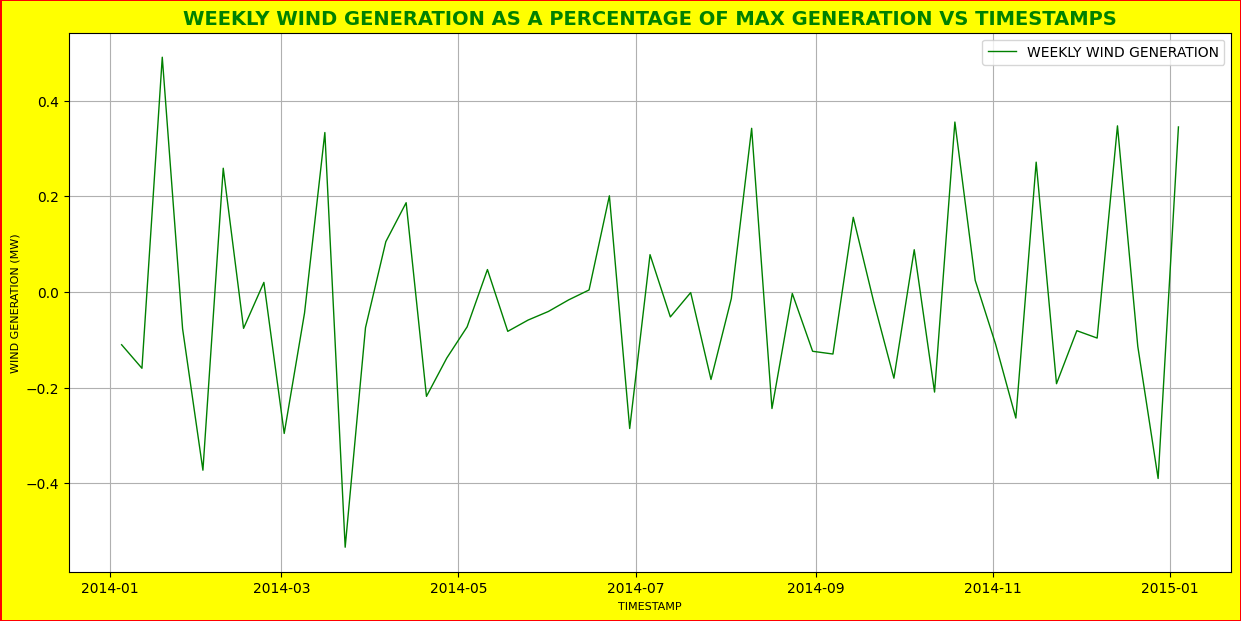

In [19]:
# MAKING A WEEKLY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPercWeekly = windPerc.astype(float).resample("W").mean()
print(windPercWeekly.tail(4))

# PRODUCING A GRAPHIC SHOWING WEEKLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize = 8)
plt.title("WEEKLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION VS TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF WEEKLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.plot(windPercWeekly.index, windPercWeekly['Change in Wind Generation'], label="WEEKLY WIND GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right")
plt.grid()
plt.show()

            Wind Generation  Change in Wind Generation
Date                                                  
2014-10-31       913.152151                  -0.032900
2014-11-30       964.340972                   0.004151
2014-12-31      1181.148253                  -0.027954
2015-01-31      1424.800000                   3.463136


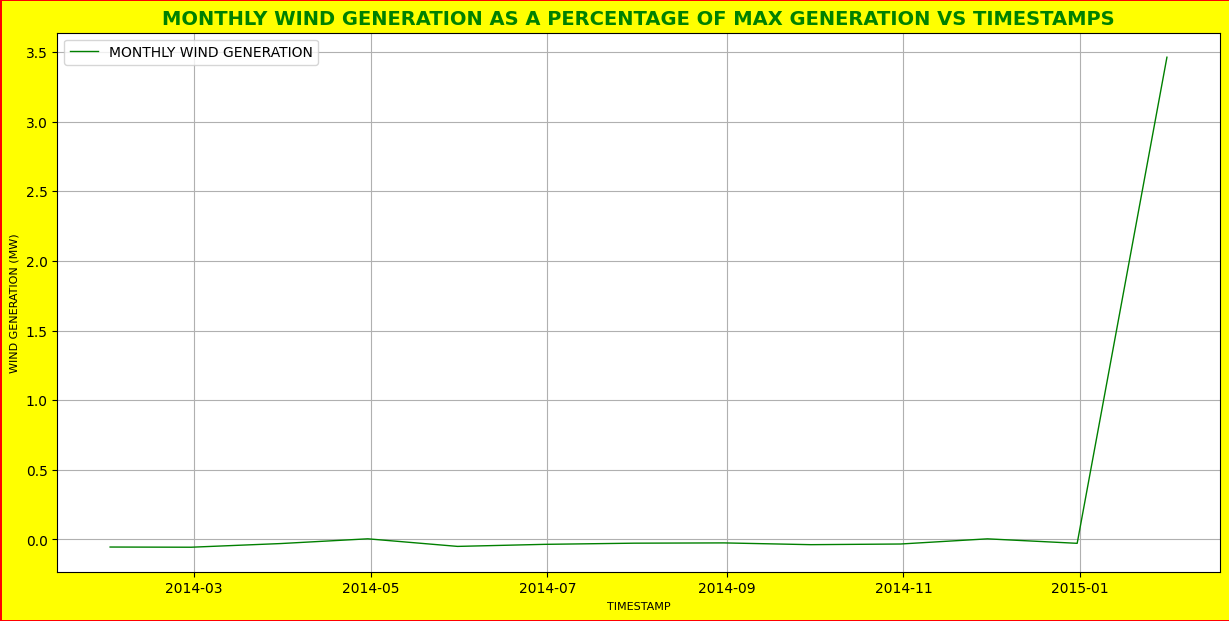

In [20]:
# MAKING A MONTHLY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPercMonthly = windPerc.astype(float).resample("M").mean()
print(windPercMonthly.tail(4))

# PRODUCING A GRAPHIC SHOWING MONTHLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize = 8)
plt.title("MONTHLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION VS TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF MONTHLY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.plot(windPercMonthly.index, windPercMonthly['Change in Wind Generation'], label="MONTHLY WIND GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()


            Wind Generation  Change in Wind Generation
Date                                                  
2014-03-31      1353.005561                  -0.046411
2014-06-30       631.641255                  -0.027269
2014-09-30       615.661051                  -0.029779
2014-12-31      1020.147192                  -0.019151
2015-03-31      1424.800000                   3.463136


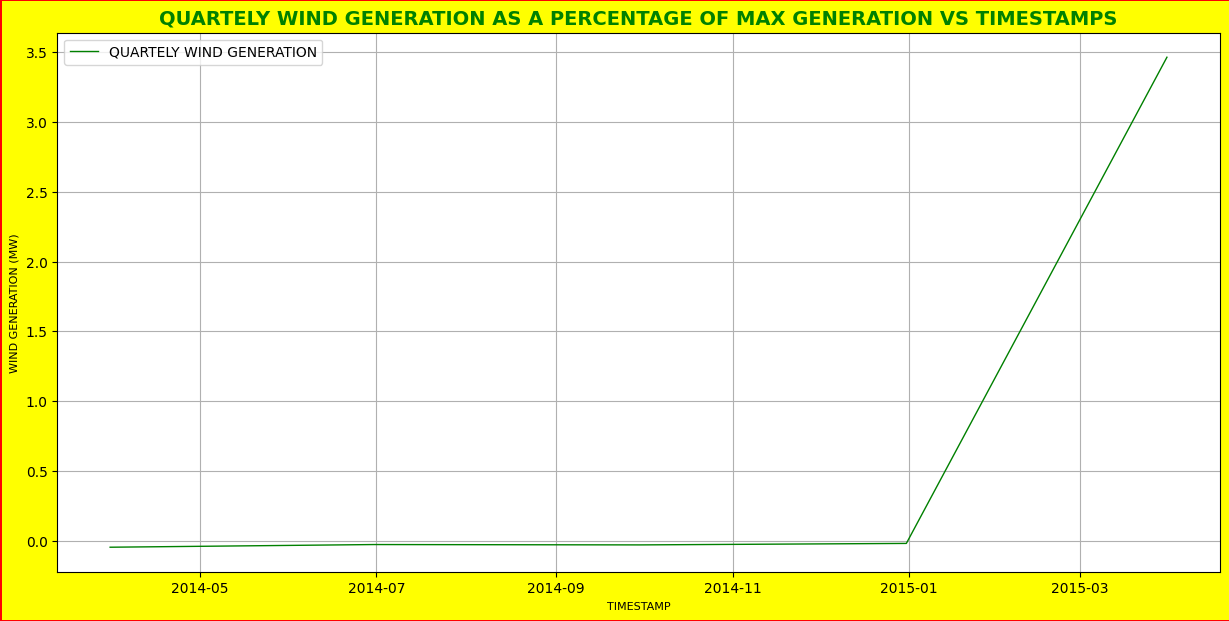

In [21]:
# MAKING A MONTHLY RESAMPLING BY CONSIDERING THE MEAN WIND GENERATION OF THE TIME RANGE
windPercQuartely = windPerc.astype(float).resample("Q").mean()
print(windPercQuartely.tail())

# PRODUCING A GRAPHIC SHOWING QUARTELY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("TIMESTAMP", color="black", fontsize = 8)
plt.ylabel("WIND GENERATION (MW)", color="black", fontsize = 8)
plt.title("QUARTELY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION VS TIMESTAMPS", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH OF QUARTELY WIND GENERATION AS A PERCENTAGE OF MAX GENERATION AGAINST TIMESTAMPS
plt.plot(windPercQuartely.index, windPercQuartely['Change in Wind Generation'], label="QUARTELY WIND GENERATION", color="green", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### QUESTION 3

Consider positive and negative ramps in wind power generation, x(t), as a percentage of the
maximum, over the hourly timescale. An hourly ramp is therefore defined as r(t,d)
=100*[x(t+d)-x(t)]/max(x) where d=1 for an hourly sampling period. Construct empirical cumulative
distribution functions (CDF) for both the positive and negative ramps and plot these with the
probability on a vertical logarithmic axis. Plot the CDF for a normal distribution with mean-zero and
standard deviation from the observations. Is the normal distribution a good model for wind power
extremes?

In [22]:
# windPerc IS USED SINCE ITS "Change in Wind Generation" COLUMN IS THE RESULST OF THE FOLLOWING FORMULA: 
# r(t) = 100 * ([p(t)/p(t-1)] - 1)/max(p)
# RAMP FUNCTION IS DEFINED AS: r(t,d) = 100 * [x  (t + d) - x(t) ] / max(x) WHERE d = 1
# r(t) = 100 * [x(t+1) - x(t)] / max(x) i.e., EQUAL TO r(t) = 100 * ([p(t)/p(t-1)] - 1)/max(p)

# CONVERT windPerc TO A NUMERIC DATA TYPE
windNum = windPerc.astype(float)
windNum.head(4)


,Wind Generation,Change in Wind Generation
Date,,
2014-01-01 02:00:00,1186.6,-0.139518
2014-01-01 03:00:00,1174.3,-0.412352
2014-01-01 04:00:00,1146.7,-0.886712
2014-01-01 05:00:00,1156.8,0.282136


In [23]:
# RAMPS - POSITIVE - SORTED BY CHANGE IN WIND GENERATION
rampsNumPos = windNum[windNum["Change in Wind Generation"] > 0]

# SORTING THE DATAFRAME BY THE CHANGE IN WIND GENERATION
sortRampsNumPos = rampsNumPos.sort_values(by="Change in Wind Generation", ascending=True)

sortRampsNumPos.head(4)

,Wind Generation,Change in Wind Generation
Date,,
2014-03-17 06:00:00,2926.0,0.003100
2014-05-09 10:00:00,18.7,0.003100
2014-03-13 00:00:00,319.5,0.003100
2014-09-19 07:00:00,501.5,0.006201


In [24]:
# RAMPS - NEGATIVE - SORTED BY CHANGE IN WIND GENERATION
rampsNumNeg = windNum[windNum["Change in Wind Generation"] < 0]

# ADDING ABSOLUTE VALUE OF CHANGE IN WIND GENERATION TO THE NEGATIVE DATAFRAME
rampsNumNeg["Change in Wind Generation (abs)"] = rampsNumNeg["Change in Wind Generation"].abs(
)

# SORTING THE RAMPERS BY CHANGE IN WIND GENERATION (ABSOLUTE VALUE)
sortRampsNumNeg = rampsNumNeg.sort_values(
    by="Change in Wind Generation (abs)", ascending=True)

sortRampsNumNeg.head(4)

,Wind Generation,Change in Wind Generation,Change in Wind Generation (abs)
Date,,,
2014-12-06 16:00:00,345.6,-0.0031,0.0031
2014-07-24 01:00:00,195.3,-0.0031,0.0031
2014-12-02 20:00:00,33.6,-0.0031,0.0031
2014-11-20 20:00:00,44.8,-0.0031,0.0031


In [25]:
# FINDING POSITIVE Y VALUES
YPositive = (np.arange(len(sortRampsNumPos['Change in Wind Generation']))) / (
    len(sortRampsNumPos['Change in Wind Generation'])+1)
print("Sample positive y\n", YPositive)

# NEGATIVE Y VALUES
YNegative = (np.arange(len(sortRampsNumNeg['Change in Wind Generation (abs)'])))/(
    len(sortRampsNumNeg['Change in Wind Generation (abs)'])+1)
print("Sample negative y\n", YNegative)


Sample positive y
 [0.00000000e+00 2.32504069e-04 4.65008138e-04 ... 9.99069984e-01
 9.99302488e-01 9.99534992e-01]
Sample negative y
 [0.00000000e+00 2.24416517e-04 4.48833034e-04 ... 9.99102334e-01
 9.99326750e-01 9.99551167e-01]


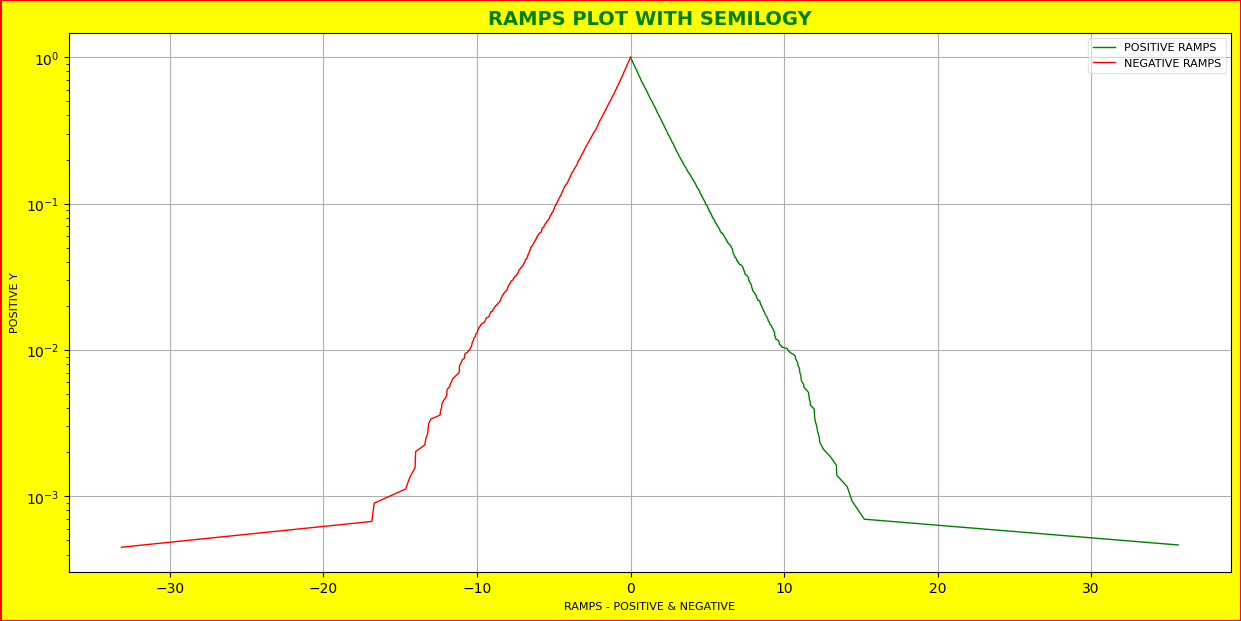

In [26]:
# PLOTTING THE RAMPS PLOT WITH SEMILOGY - POSITIVE AND NEGATIVE RAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("RAMPS - POSITIVE & NEGATIVE", color="black", fontsize=8)
plt.ylabel("POSITIVE Y", color="black", fontsize=8)
plt.title("RAMPS PLOT WITH SEMILOGY", color="green",
          fontsize=14, fontweight="bold")

# PLOTTING THE POSITIVE RAMPS
plt.semilogy(sortRampsNumPos["Change in Wind Generation"], 1 -
             YPositive, label="POSITIVE RAMPS", color="green", linewidth=1)

# PLOTTING THE NEGATIVE RAMPS
plt.semilogy(-sortRampsNumNeg["Change in Wind Generation (abs)"],
             1-YNegative, label="NEGATIVE RAMPS", color="red", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right", fontsize=8, framealpha=0.5)
plt.grid()
plt.show()


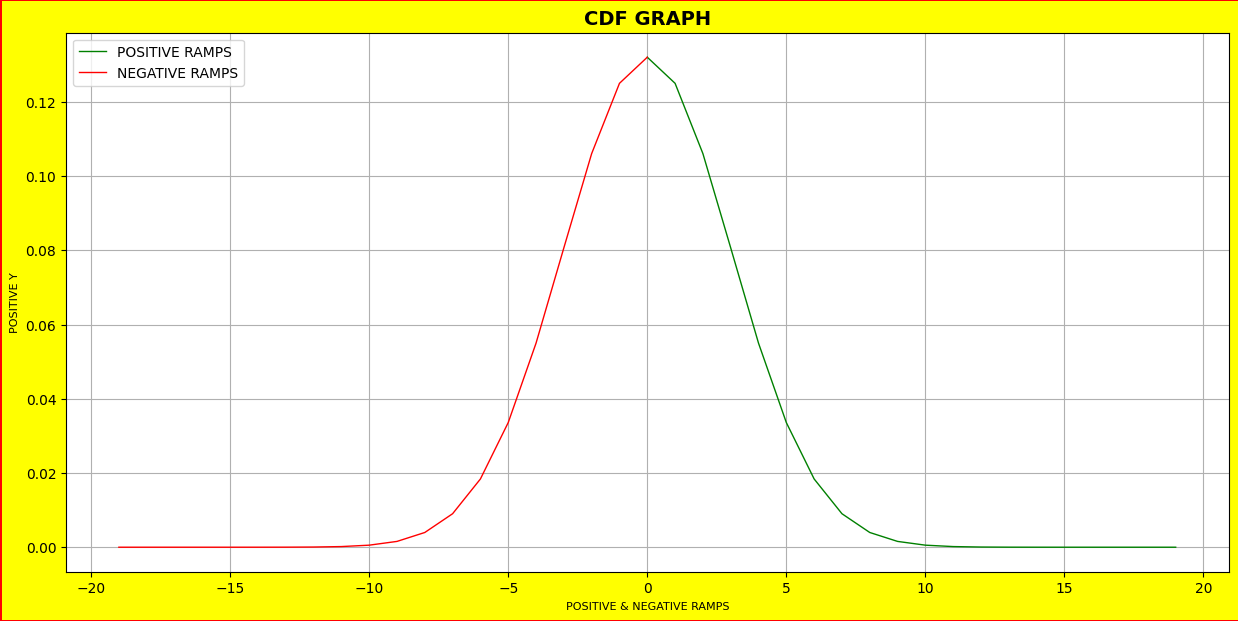

In [27]:
# CDF FOR NORMAL DISTRIBUTION WITH MEAN ZERO AND STANDARD DEVIATION FROM THE SAMPLE
x = range(0, 20)
sample = windNum["Change in Wind Generation"]
stDeviation = statistics.stdev(windNum["Change in Wind Generation"])

# PLOTTING THE CDF GRAPH WITH POSITIVE AND NEGATIVE RAMPS - SEMILOGY
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.title('CDF GRAPH', color="black", fontsize=14, fontweight="bold")
plt.xlabel('POSITIVE & NEGATIVE RAMPS', color="black", fontsize = 8)
plt.ylabel('POSITIVE Y', color="black", fontsize = 8)

# PLOTTING THE POSITIVE RAMPS AND NEGATIVE RAMPS
plt.plot(x, stats.norm.pdf(x, 0, stDeviation), label="POSITIVE RAMPS", color="green", linewidth=1)
plt.plot([item * -1 for item in x],
         stats.norm.pdf(x, 0, stDeviation), label="NEGATIVE RAMPS", color="red", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()


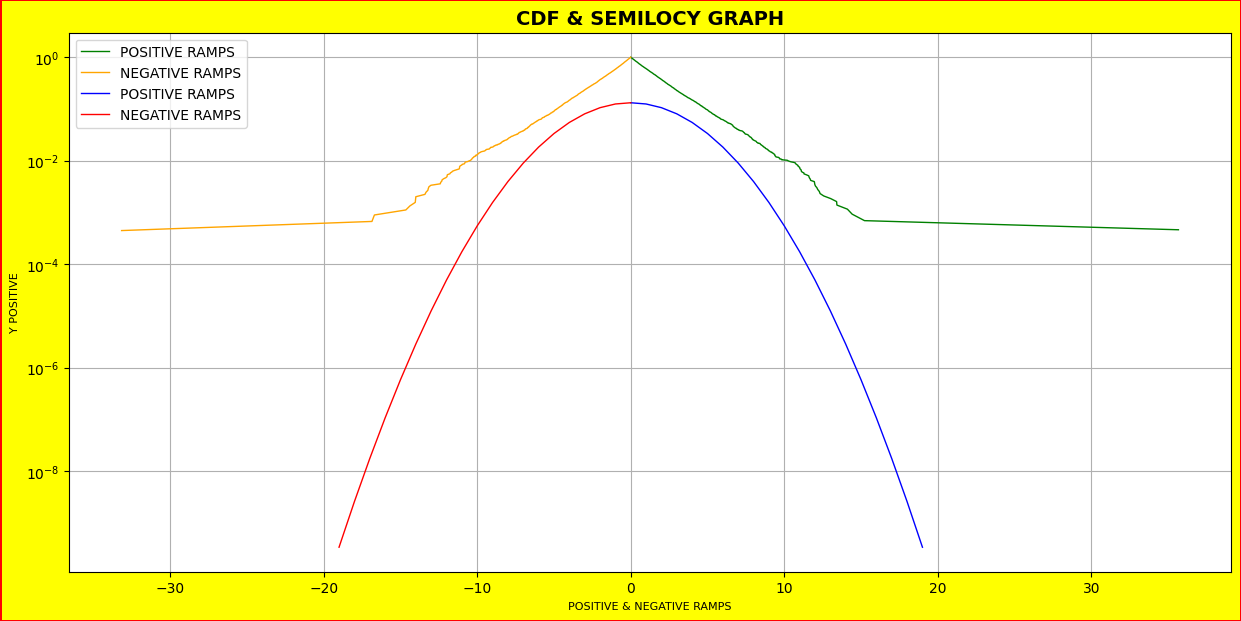

In [28]:
# SEMILOGY & CDF GRAPH - POSITIVE AND NEGATIVE RAMPS
plt.figure(figsize=(15, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.title('CDF & SEMILOCY GRAPH',
          color="black", fontsize=14, fontweight="bold")
plt.xlabel('POSITIVE & NEGATIVE RAMPS', color="black", fontsize = 8)
plt.ylabel('Y POSITIVE', color="black", fontsize = 8)

# PLOTTING THE POSITIVE RAMPS AND NEGATIVE RAMPS ON THE SAME GRAPH WITH SEMILOGY AND CDF
plt.semilogy(sortRampsNumPos["Change in Wind Generation"], 1-YPositive, label="POSITIVE RAMPS", color="green", linewidth=1)
plt.semilogy(
    -sortRampsNumNeg['Change in Wind Generation (abs)'], 1-YNegative, label="NEGATIVE RAMPS", color="orange", linewidth=1)

# PLOTTING THE POSITIVE RAMPS AND NEGATIVE RAMPS ON THE SAME GRAPH WITH SEMILOGY AND CDF
plt.plot(x, stats.norm.pdf(x, 0, stDeviation), label="POSITIVE RAMPS", color="blue", linewidth=1)
plt.plot([item * -1 for item in x],
         stats.norm.pdf(x, 0, stDeviation), label="NEGATIVE RAMPS", color="red", linewidth=1)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### QUESTION 4

National power system operators are tasked with the challenge of balancing supply and
demand. They need to understand the variability in wind generation over different timescales.
Investigate variability over timescales from one hour to one day by plotting the 1%, 5%, 95% and
99% percentiles. This can be achieved using distributions of the ramps r(t,d) with d =1,2,…,24.

In [55]:
# TIMESCALES SHIFT
timeScales = []
windGenerat = windPower["Wind Generation"]

# LOOPING THROUGH THE DATAFRAME TO FIND THE TIMESCALES SHIFT FOR EACH DAY
for hour in np.arange(1, 24, 1):
    # CALCULATING THE TIMESCALES SHIFT FOR EACH DAY. FORMULA: r(t,d) = 100 * [x  (t + d) -x(t) ] / max(x)
    daily = 100 * ((windGenerat-windGenerat.shift(hour))/(windGenerat.max()))

    timeScales.append(daily)

# PDF GRAPH - TIMESCALES SHIFT
genValues = pd.DataFrame(timeScales).T

# FILL NaN VALUES WITH 0 AND SHOW THE FIRST 10 ROWS
genValues.fillna(0, inplace=True)
genValues.head(4)


,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,...,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00,-0.108514,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 03:00:00,-0.381348,-0.489862,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 04:00:00,-0.855708,-1.237056,-1.34557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# TIMESCALES SHIFT
timeScales = []

# LOOPING THROUGH THE DATAFRAME TO FIND THE TIMESCALES SHIFT FOR EACH DAY 
for index in range(1, 25):
    daily = ((windPower["Wind Generation"]-windPower["Wind Generation"].shift(
        index))/(windPower["Wind Generation"].max()))*100
    timeScales.append(daily)

# PDF GRAPH - TIMESCALES SHIFT
genValues = pd.DataFrame(timeScales).T

# FILL NaN VALUES WITH 0 AND SHOW THE FIRST 10 ROWS
genValues.fillna(0, inplace=True)
genValues.head(4)

,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,...,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00,-0.108514,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 03:00:00,-0.381348,-0.489862,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 04:00:00,-0.855708,-1.237056,-1.34557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# COLUMN NAMES FOR THE TIMESCALES SHIFT
timeScales = ['1h', '2h', '3h', '4h', '5h', '6h', '7h', '8h', '9h', '10h', '11h', '12h', '13h', '14h', '15h', '16h', '17h', '18h', '19h', '20h', '21h', '22h', '23h', '24h']
genValues.columns = timeScales
genValues

,1h,2h,3h,4h,5h,6h,7h,8h,9h,10h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-01 02:00:00,-0.108514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-01 03:00:00,-0.381348,-0.489862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-01 04:00:00,-0.855708,-1.237056,-1.345570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-01 05:00:00,0.313139,-0.542568,-0.923916,-1.032430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 20:00:00,-0.936318,-0.778198,1.075836,-1.540894,-5.611707,-4.985428,-2.560923,-1.280461,-2.846159,-6.120171,...,-7.236312,-7.800583,-7.595957,-7.267316,-7.614559,-9.567806,-9.174056,-7.366528,-4.349848,-4.005705
2014-12-31 21:00:00,1.085137,0.148819,0.306939,2.160972,-0.455757,-4.526570,-3.900291,-1.475786,-0.195325,-1.761022,...,-5.934148,-6.151175,-6.715446,-6.510820,-6.182179,-6.529423,-8.482669,-8.088919,-6.281391,-3.264711
2014-12-31 22:00:00,5.772927,6.858064,5.921746,6.079866,7.933900,5.317170,1.246357,1.872636,4.297141,5.577603,...,-0.778198,-0.161220,-0.378248,-0.942519,-0.737893,-0.409252,-0.756495,-2.709741,-2.315992,-0.508464


In [54]:
# PERCENTILES FOR THE TIMESCALES SHIFT
perc = genValues.quantile([0.01, 0.05, 0.95, 0.99])

# TRANSPOSE THE PERCENTILES DATAFRAME AND SHOW THE FIRST 2 ROWS
percT = perc.T
percT

# import dataframe_image as dfi
# dfi.export(perc, 'perc.png')

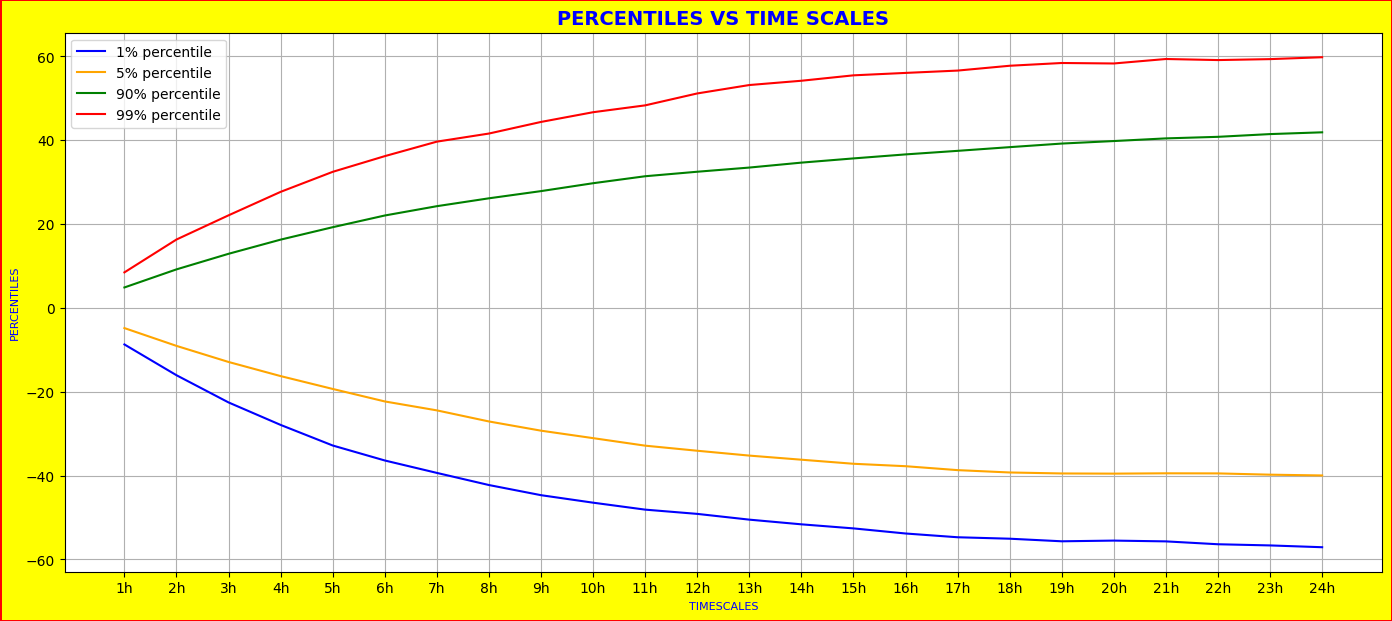

In [32]:
# PERCENTILES GRAPHS - TIMESCALES SHIFT
plt.figure(figsize=(17, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.title("PERCENTILES VS TIME SCALES",
          color="blue", fontsize=14, fontweight="bold")
plt.xlabel("TIMESCALES", color="blue", fontsize=8)
plt.ylabel("PERCENTILES", color="blue", fontsize=8)

# PLOTTING THE PERCENTILES VS TIME SCALES SHIFT 
plt.plot(percT.index, percT[0.01], color="blue", label="1% percentile")
plt.plot(percT.index, percT[0.05], color="orange", label="5% percentile")
plt.plot(percT.index, percT[0.95], color="green", label="90% percentile")
plt.plot(percT.index, percT[0.99], color="red", label="99% percentile")

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### QUESTION 5

Calculate and plot the autocorrelation of wind generation for lags over 10 days. Comment on the
structure of the autocorrelation.

In [33]:
# AUTOCORRELATION GRAPH - TIMESCALES SHIFT
autoCorr = sm.tsa.acf(windNum['Wind Generation'], nlags=240)
autoCorr[0:5]

array([1.        , 0.99194147, 0.97259602, 0.94626139, 0.91599461])

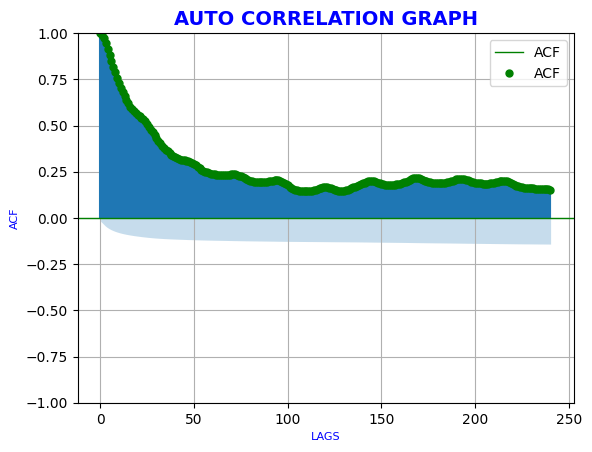

In [34]:
# ACF PLOT FOR THE TIMESCALES SHIFT
plot_acf(windNum["Wind Generation"], lags=240,
         label="ACF", color="green", linewidth=1)

# PLOT PROPERTIES FOR THE AUTOCORRELATION GRAPH
plt.rcParams["figure.figsize"] = (16, 7)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"

# PLOT PROPERTIES FOR THE AUTOCORRELATION GRAPH
plt.title("AUTO CORRELATION GRAPH", color="blue",
          fontsize=14, fontweight="bold")
plt.xlabel("LAGS", color="blue", fontsize = 8)
plt.ylabel("ACF", color="blue", fontsize = 8)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper right", frameon=True)
plt.grid()
plt.show()

#### QUESTION 6

Calculate and plot the autocorrelation of change in wind generation for lags over 10 days.
Include horizontal lines to detect statistically significance values (p<0.05). Is there any evidence of
diurnal seasonality? Might it be more appropriate to model the change in wind generation than the
wind generation?

In [35]:
# AUTO CORRELATION WITH CHANGE IN WIND GENERATION
autoCorrChange = sm.tsa.acf(windNum['Change in Wind Generation'], nlags=240)
autoCorrChange[0:5]


array([1.        , 0.7040218 , 0.436171  , 0.24613952, 0.12641388])

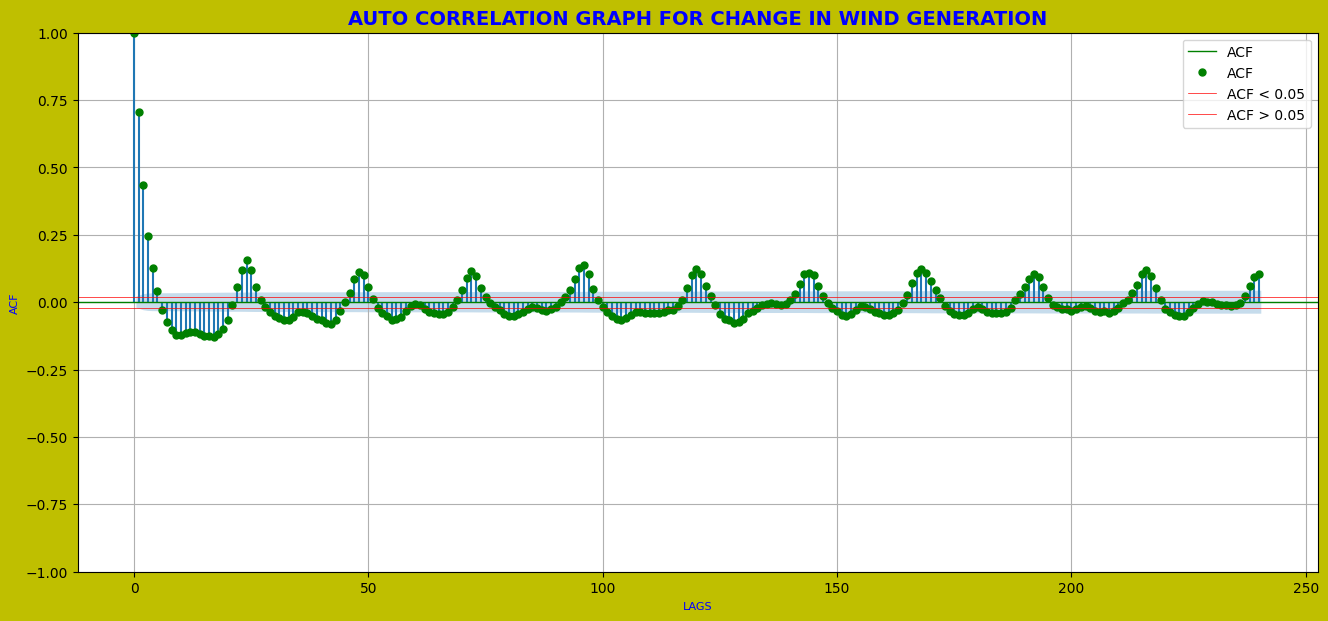

In [36]:
# ACF FOR CHANGE IN WIND GENERATION
plot_acf(windNum["Change in Wind Generation"], lags=240,
         label="ACF", color="green", linewidth=1)

# HORIZONTAL BOUNDARIES FOR THE ACF
bound1 = +1.96/(np.sqrt(len(windNum)))
bound2 = -1.96/(np.sqrt(len(windNum)))

# PLOT LINES FOR THE BOUNDARIES 
plt.axhline(bound1, color='r', label='ACF < 0.05', linewidth=.5)
plt.axhline(bound2, color='r', label='ACF > 0.05', linewidth=.5)

# PLOT PROPERTIES FOR THE AUTOCORRELATION GRAPH
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'
plt.title('AUTO CORRELATION GRAPH FOR CHANGE IN WIND GENERATION',
          color="blue", fontsize=14, fontweight="bold")
plt.xlabel('LAGS', color="blue", fontsize = 8)
plt.ylabel('ACF', color="blue", fontsize = 8)

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc='upper right')
plt.grid()
plt.show()

#### QUESTION 7

Use a variance ratio test to investigate the structure of the wind generation time series. Can the
null hypothesis of a random walk be rejected? Is there evidence of either mean-reversion or
mean-aversion?

In [37]:
# VARIANCE RATIO FOR WIND GENERATION
vRatio = VarianceRatio(windNum['Wind Generation'], lags=240)
vRatio

Test Statistic,-2.558
P-value,0.011
Lags,240


In [38]:
# ADF TEST FOR WIND GENERATION 
F = ADF(windNum['Wind Generation'])
F.summary()

Test Statistic,-9.498
P-value,0.000
Lags,26


#### QUESTION 8

Estimate the optimal window for a simple moving average. Is there a simple benchmark that
improves on the persistence benchmark?

In [39]:
# SIMPLE MOVING AVERAGE (SMA) FOR WIND GENERATION CALCULATION
simpleMAV = []

arr = windPower["Wind Generation"]
windowSize = range(1, 25)

# MAKING A SERIES OF WIND GENERATION
pdSeries = pd.Series(arr)

# FOR LOOP FOR CALCULATING SMA FOR EACH WINDOW SIZE
for i in windowSize:
    wins = pdSeries.rolling(i)          # CALCULATING MOVING AVERAGES FOR EACH WINDOW SIZE
    movAvgs = wins.mean()               # CALCULATING MEAN OF MOVING AVERAGES
    simpleMAV.append(movAvgs)           # APPENDING TO LIST OF EVENTS FOR EACH WINDOW SIZE 

# SHOWING THE FIRST 6 ROWS OF THE SMA
simpleMAV[0:6]

[Date
 2014-01-01 01:00:00    1190.1
 2014-01-01 02:00:00    1186.6
 2014-01-01 03:00:00    1174.3
 2014-01-01 04:00:00    1146.7
 2014-01-01 05:00:00    1156.8
                         ...  
 2014-12-31 20:00:00     996.8
 2014-12-31 21:00:00    1031.8
 2014-12-31 22:00:00    1218.0
 2014-12-31 23:00:00    1312.1
 2015-01-01 00:00:00    1424.8
 Name: Wind Generation, Length: 8760, dtype: float64,
 Date
 2014-01-01 01:00:00        NaN
 2014-01-01 02:00:00    1188.35
 2014-01-01 03:00:00    1180.45
 2014-01-01 04:00:00    1160.50
 2014-01-01 05:00:00    1151.75
                         ...   
 2014-12-31 20:00:00    1011.90
 2014-12-31 21:00:00    1014.30
 2014-12-31 22:00:00    1124.90
 2014-12-31 23:00:00    1265.05
 2015-01-01 00:00:00    1368.45
 Name: Wind Generation, Length: 8760, dtype: float64,
 Date
 2014-01-01 01:00:00            NaN
 2014-01-01 02:00:00            NaN
 2014-01-01 03:00:00    1183.666667
 2014-01-01 04:00:00    1169.200000
 2014-01-01 05:00:00    1159.266667
 

In [40]:
# DATAFRAME OF SMA FOR WIND GENERATION
simpleMAV = pd.DataFrame(simpleMAV)

# FILLING NaN VALUES WITH 0
simpleMAV.fillna(0, inplace=True)

# TRANSPOSE OF DATAFRAME OF SMA FOR WIND GENERATION
simpleMAVT = simpleMAV.T
simpleMAVT.head(2)

,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,...,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,1190.1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00,1186.6,1188.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# COLUMNS OF DATAFRAME OF SMA FOR WIND GENERATION
windowSize=['number1','number2','number3','number4','number5','number6','number7','number8','number9','number10','number11','number12','number13','number14','number15','number16','number17','number18','number19','number20','number21','number22','number23','number24']

# ADDING COLUMNS TO DATAFRAME OF SMA
simpleMAVT.columns = windowSize
simpleMAVT.head(2)

,number1,number2,number3,number4,number5,number6,number7,number8,number9,number10,...,number15,number16,number17,number18,number19,number20,number21,number22,number23,number24
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,1190.1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00,1186.6,1188.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# MEAN ABSOLUTE ERROR FOR SMA FOR WIND GENERATION
MAErrors = []

# FOR LOOP FOR CALCULATING MAE FOR EACH WINDOW SIZE
for i in range(0, 24):
    MAErr = mae(windPower["Wind Generation"], (simpleMAVT).iloc[:, i])
    MAErrors.append(MAErr)


#### QUESTION 9

Evaluate the mean-Absolute-error (MAE) performance of the persistence benchmark forecast
over forecast horizons from one hour to one day. Plot MAE as a percentage of the maximum
generation for the persistence benchmark.

In [43]:
# LOOP FOR CALCULATING MEAN ABSOLUTE ERROR FOR EACH WINDOW SIZE
for i in range(1, 25):
    windPower["Wind Generation"].shift(i)
    
# LISTS FOR PERSISTENCE AND PERSISTENCE TRENCE
persistance = []
pe_tance = []

# LOOP FOR CALCULATING PERSISTENCE AND PERSISTENCE TRENCE
for j in range(1, 25):
    arr = windPower["Wind Generation"].shift(j)
    pe_tance.append(arr)
    
# DATAFRAME OF PERSISTENCE AND PERSISTENCE TRENCE
p = pd.DataFrame(pe_tance).T
p.fillna(0, inplace=True)
p.head(4)


,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,...,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00,1190.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 03:00:00,1186.6,1190.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 04:00:00,1174.3,1186.6,1190.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# MEAN ABSOLUTE ERRORS FOR PERSISTENCE
persistenceErr = []

# FOR LOOP FOR CALCULATING MAE FOR EACH WINDOW SIZE 
for i in range(0, 24):
    err = mae(windPower["Wind Generation"], (p).iloc[:, i])
    persistenceErr.append(err)
    
persistenceErr[0:5]

[66.62908675799086,
 124.43453196347032,
 175.14756849315071,
 219.9664497716895,
 260.05316210045663]

In [45]:
# PERCENTAGE OF MEAN ABSOLUTE ERROR FOR PERSISTENCE - BENCHMARK MODEL
percMAE = []

# FOR LOOP FOR CALCULATING MAE AS PERCENTAGE
for i in range(len(persistenceErr)):
    percs = (persistenceErr[i]/max(persistenceErr))*100
    percMAE.append(percs)
percMAE[0:5]

[11.916364455240553,
 22.254653423058635,
 31.32449146713363,
 39.340181757638376,
 46.50954122457846]

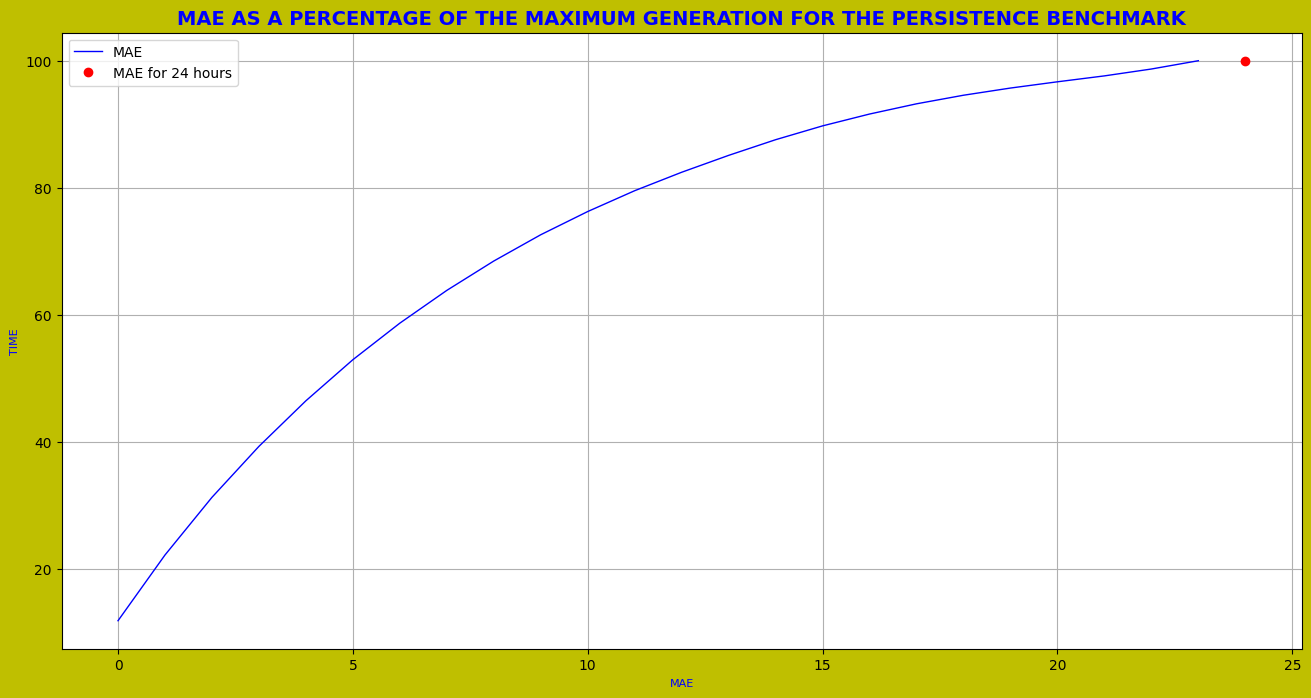

In [46]:
# MAE AS A PERCENTAGE OF THE MAXIMUM GENERATION FOR THE PERSISTENCE BENCHMARK
plt.title('MAE AS A PERCENTAGE OF THE MAXIMUM GENERATION FOR THE PERSISTENCE BENCHMARK',
          color="blue", fontsize=14, fontweight="bold")
plt.xlabel('MAE', color="blue", fontsize = 8)
plt.ylabel('TIME', color="blue", fontsize = 8)

# PLOTTING THE GRAPH OF MAE AS A PERCENTAGE OF THE MAXIMUM GENERATION FOR THE PERSISTENCE BENCHMARK
plt.plot(percMAE, color="blue", linewidth=1, label="MAE")
plt.plot(len(percMAE), percMAE[-1], 'ro', label="MAE for 24 hours")

# ADDING A LEGEND, A GRID AND SHOWING THE GRAPH
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### QUESTION 10

Loop over the number of parameters to use in an ARIMA model for describing wind generation
and use information criteria (AIC and BIC) to find the optimal ARIMA model.


In [47]:
# PARAMETERS FOR ARIMA MODEL, ARIMA TEST DIFFERENT COMBINATIONS OF PARAMETERS WITH P AND Q RANGING FROM 1 TO 5
a = b = range(1, 5) 
modelNum = 1
difference = 1 # DIFFERENCE ORDER FOR ARIMA MODEL

# FOR LOOP FOR CALCULATING AIC AND BIC FOR EACH COMBINATION OF PARAMETERS
# ARIMA MODEL IS FITTED WITH DIFFERENT COMBINATIONS OF "a" VALUES IN THE ORDER PARAMETERS.
for par in a:
    
    # ARIMA MODEL IS FITTED WITH DIFFERENT COMBINATIONS OF "b" VALUES IN THE ORDER PARAMETERS.
    for param in b:
        # CREATING THE ARIMA MODEL WITH THE PARAMETERS AND THE DIFFERENCE ORDER
        mod = SARIMAX(windPower["Wind Generation"], order=(par, difference, param))

        # FITTING THE ARIMA MODEL
        output = mod.fit()
        
        # PRINTING THE PARAMETERS AND AIC AND BIC
        print('Mode 1 a:{} b:{}'.format(par, param))
        print('- AIC:{} - BIC:{}'.format(output.aic, output.bic))

Mode 1 a:1 b:1
- AIC:98978.47990270144 - BIC:98999.71341376792
Mode 1 a:1 b:2
- AIC:98964.8579600763 - BIC:98993.16930816496
Mode 1 a:1 b:3
- AIC:98966.57602091353 - BIC:99001.96520602435
Mode 1 a:1 b:4
- AIC:98966.15433036143 - BIC:99008.6213524944
Mode 1 a:2 b:1
- AIC:98854.03274496886 - BIC:98882.34409305752
Mode 1 a:2 b:2
- AIC:98784.94848665931 - BIC:98820.33767177013
Mode 1 a:2 b:3
- AIC:98968.83917507702 - BIC:99011.30619721
Mode 1 a:2 b:4
- AIC:98812.83318250084 - BIC:98862.37804165597
Mode 1 a:3 b:1
- AIC:98782.50113935492 - BIC:98817.89032446574
Mode 1 a:3 b:2
- AIC:98784.92642390166 - BIC:98827.39344603464
Mode 1 a:3 b:3
- AIC:98788.93076409907 - BIC:98838.47562325421
Mode 1 a:3 b:4
- AIC:98787.23044566701 - BIC:98843.85314184432
Mode 1 a:4 b:1
- AIC:98966.16875383772 - BIC:99008.63577597069
Mode 1 a:4 b:2
- AIC:98786.61704773722 - BIC:98836.16190689236
Mode 1 a:4 b:3
- AIC:98952.98720187313 - BIC:99009.60989805043
Mode 1 a:4 b:4
- AIC:98981.30658352596 - BIC:99045.007116725